In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import csv

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
math = pd.read_csv(
    '/content/drive/MyDrive/Study_Based_Recommendation/student-mat.csv',
    delimiter=';',
    quoting=csv.QUOTE_NONE,
    on_bad_lines='skip'
)

In [6]:
for col in math.select_dtypes(include=['object']).columns:
    math[col] = math[col].str.replace('"', '', regex=False)

numeric_cols = ['studytime', 'absences', 'G1', 'G2', 'G3']
for col in numeric_cols:
    math[col] = pd.to_numeric(math[col], errors='coerce')

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
features = ['studytime', 'absences', 'G3']
X = math[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
math = math.loc[X.index]  # align index to X
math['cluster'] = labels

In [9]:
cluster_profile = math.groupby('cluster')[features].mean()
print(cluster_profile)

         studytime   absences         G3
cluster                                 
0         1.612546   5.483395   9.158672
1         2.851852   3.577778  13.244444
2         2.000000  41.333333   9.000000


In [11]:
def get_recommendations(cluster_id, row):
    if cluster_id == 0:
        return ("Maintain current routine; try peer tutoring for peers.", "Group study, Pomodoro apps")
    elif cluster_id == 1:
        return ("Increase focused study hours, reduce absences, follow schedule.", "Online courses, calendar apps")
    elif cluster_id == 2:
        return ("Add weekly review sessions, use digital flashcards.", "Flashcard apps, weekly planner")
    else:
        return ("Personalized counseling suggested.", "See academic advisor")

In [12]:
math['Recommendation'], math['Tool_or_Technique'] = zip(*math.apply(lambda row: get_recommendations(row['cluster'], row), axis=1))


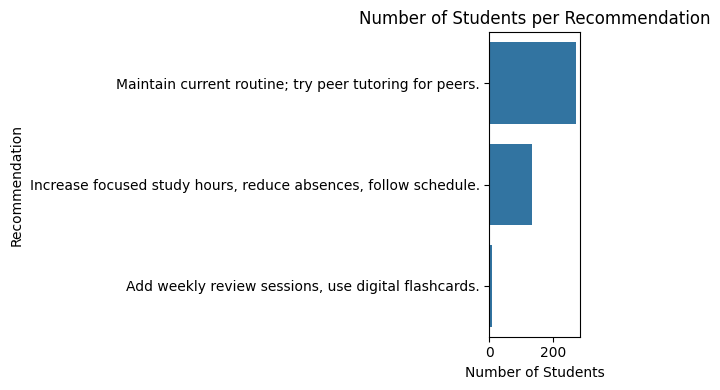

In [14]:
import os
os.makedirs("visualizations", exist_ok=True)

plt.figure(figsize=(6,4))
sns.countplot(y=math['Recommendation'], order=math['Recommendation'].value_counts().index)
plt.title("Number of Students per Recommendation")
plt.xlabel("Number of Students")
plt.ylabel("Recommendation")
plt.tight_layout()
plt.savefig("visualizations/recommendation_countplot.png")
plt.show()


In [15]:
math.to_csv('/content/drive/MyDrive/Study_Based_Recommendation/student-mat_with_recommendations.csv', index=False)


In [16]:
print(math[['cluster', 'Recommendation', 'Tool_or_Technique']].value_counts())


cluster  Recommendation                                                   Tool_or_Technique             
0        Maintain current routine; try peer tutoring for peers.           Group study, Pomodoro apps        271
1        Increase focused study hours, reduce absences, follow schedule.  Online courses, calendar apps     135
2        Add weekly review sessions, use digital flashcards.              Flashcard apps, weekly planner      9
Name: count, dtype: int64
